In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [3]:
# Membuat duplikat Dataframe
df_train = df.copy()

In [4]:
df_train.head(2)

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18


**Penyesuaian Nama Kolom dan Value**

In [5]:
# Mengurutkan dataset berdasarkan Tanggal dan Jam
df_train = df_train.sort_values(['dteday', 'hr']).reset_index()
df_train.drop('index', axis=1, inplace=True)

In [6]:
# Mengubah value kolom 'season' dan 'weathersit' dari numerik menjadi penamaan kategori yang sesuai
df_train['season'] = df_train['season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'fall'})
df_train['weathersit'] = df_train['weathersit'].replace({1:'clear', 2:'cloudy', 3:'Light snow/Light rain', 4:'Heavy rain/Snow'})

In [7]:
# Mengubah beberapa nama kolom
df_train = df_train.rename(columns={'weathersit':'weather',
                       'dteday':'date',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df_train.head(2)

,date,humidity,weather,holiday,season,atemp,temp,hour,casual,registered,count
0,2011-01-01,0.81,clear,0,winter,0.2879,0.24,0,3,13,16
1,2011-01-01,0.80,clear,0,winter,0.2727,0.22,1,8,32,40


In [11]:
df_train['season'].value_counts()

summer    3169
spring    3074
winter    3023
fall      2899
Name: season, dtype: int64

In [10]:
df_train['weather'].value_counts()

clear                    8071
cloudy                   3119
Light snow/Light rain     972
Heavy rain/Snow             3
Name: weather, dtype: int64

**Mengubah Tipe Data dan Memisahkan Data Kolom 'date'**

In [12]:
# Mengubah tipe data 'date' menjadi DateTime
df_train['date'] = df_train['date'].astype('datetime64')

# Membuat kolom untuk memisahkan data Tahun, Bulan, dan Hari
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day_name()

In [13]:
# Mengubah tipe data feature 'holiday', 'year', dan 'month' menjadi category
df_train['holiday'] = df_train['holiday'].astype('category')
df_train['year'] = df_train['year'].astype('category')
df_train['month'] = df_train['month'].astype('category')

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        12165 non-null  datetime64[ns]
 1   humidity    12165 non-null  float64       
 2   weather     12165 non-null  object        
 3   holiday     12165 non-null  category      
 4   season      12165 non-null  object        
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hour        12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  count       12165 non-null  int64         
 11  year        12165 non-null  category      
 12  month       12165 non-null  category      
 13  day         12165 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 1.1+ MB


In [15]:
df_train.duplicated().any()

False

In [16]:
# Cek info lebih detail untuk setiap feature
listItem = []

for col in df_train.columns:
    listItem.append([col, df_train[col].dtype, df_train[col].isna().sum(), round((df_train[col].isna().sum()/len(df_train[col]))*100,2),
                    df_train[col].nunique(), list(df_train[col].drop_duplicates().sample(2).values)])

df_train_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_train_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,date,datetime64[ns],0,0.0,731,"[2011-03-03T00:00:00.000000000, 2011-11-03T00:..."
1,humidity,float64,0,0.0,89,"[0.87, 1.0]"
2,weather,object,0,0.0,4,"[clear, Heavy rain/Snow]"
3,holiday,category,0,0.0,2,"[0, 1]"
4,season,object,0,0.0,4,"[summer, fall]"
5,atemp,float64,0,0.0,65,"[0.6818, 0.4242]"
6,temp,float64,0,0.0,50,"[0.96, 0.42]"
7,hour,int64,0,0.0,24,"[6, 0]"
8,casual,int64,0,0.0,305,"[6, 110]"
9,registered,int64,0,0.0,742,"[876, 518]"


In [17]:
# Drop kolom (feature) yang tidak diperlukan
df_train.drop(columns=['date', 'casual', 'registered'], inplace=True)

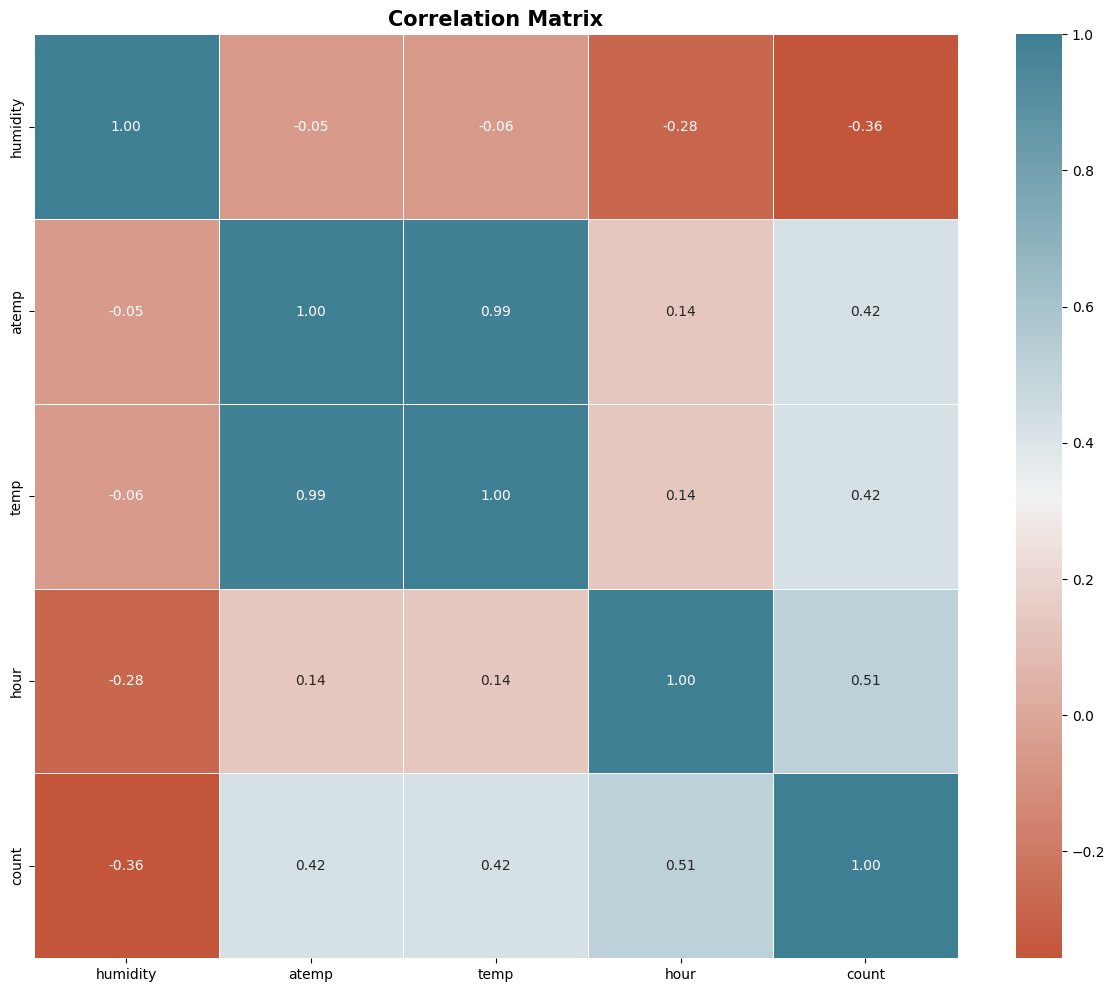

In [18]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_train.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   humidity  12165 non-null  float64 
 1   weather   12165 non-null  object  
 2   holiday   12165 non-null  category
 3   season    12165 non-null  object  
 4   atemp     12165 non-null  float64 
 5   temp      12165 non-null  float64 
 6   hour      12165 non-null  int64   
 7   count     12165 non-null  int64   
 8   year      12165 non-null  category
 9   month     12165 non-null  category
 10  day       12165 non-null  object  
dtypes: category(3), float64(3), int64(2), object(3)
memory usage: 796.7+ KB


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [20]:
calc_vif(df_train[['humidity', 'atemp', 'temp', 'hour', 'count']])

,variables,VIF
0,humidity,6.047913
1,atemp,338.317799
2,temp,306.108156
3,hour,3.849810
4,count,3.063218


In [21]:
# Drop kolom 'temp'
df_train = df_train.drop('temp', axis=1)

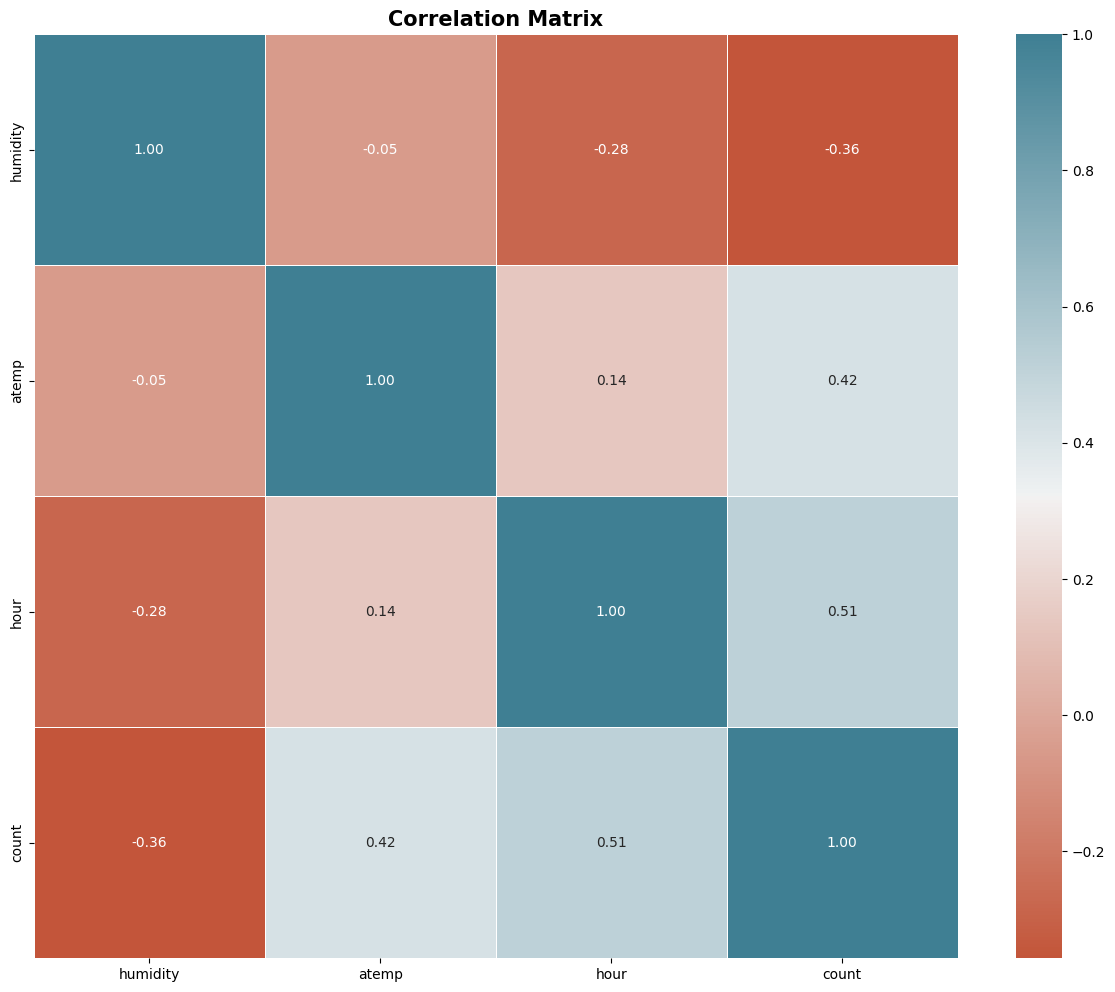

In [22]:
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_train.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

In [103]:
calc_vif(df_train[['humidity', 'atemp', 'hour', 'count']])

,variables,VIF
0,humidity,5.571588
1,atemp,8.360153
2,hour,3.837270
3,count,3.063059


**Checking Outliers**

In [104]:
# Mengecek informasi statistik deskriptif data numerik
df_train.describe().select_dtypes(['float','int'])

,humidity,atemp,hour,count
count,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,0.476996,11.519770,189.271023
std,0.192102,0.171857,6.931872,181.223903
min,0.000000,0.000000,0.000000,1.000000
25%,0.470000,0.333300,6.000000,40.000000
50%,0.620000,0.484800,12.000000,142.000000
75%,0.780000,0.621200,18.000000,282.000000
max,1.000000,1.000000,23.000000,970.000000


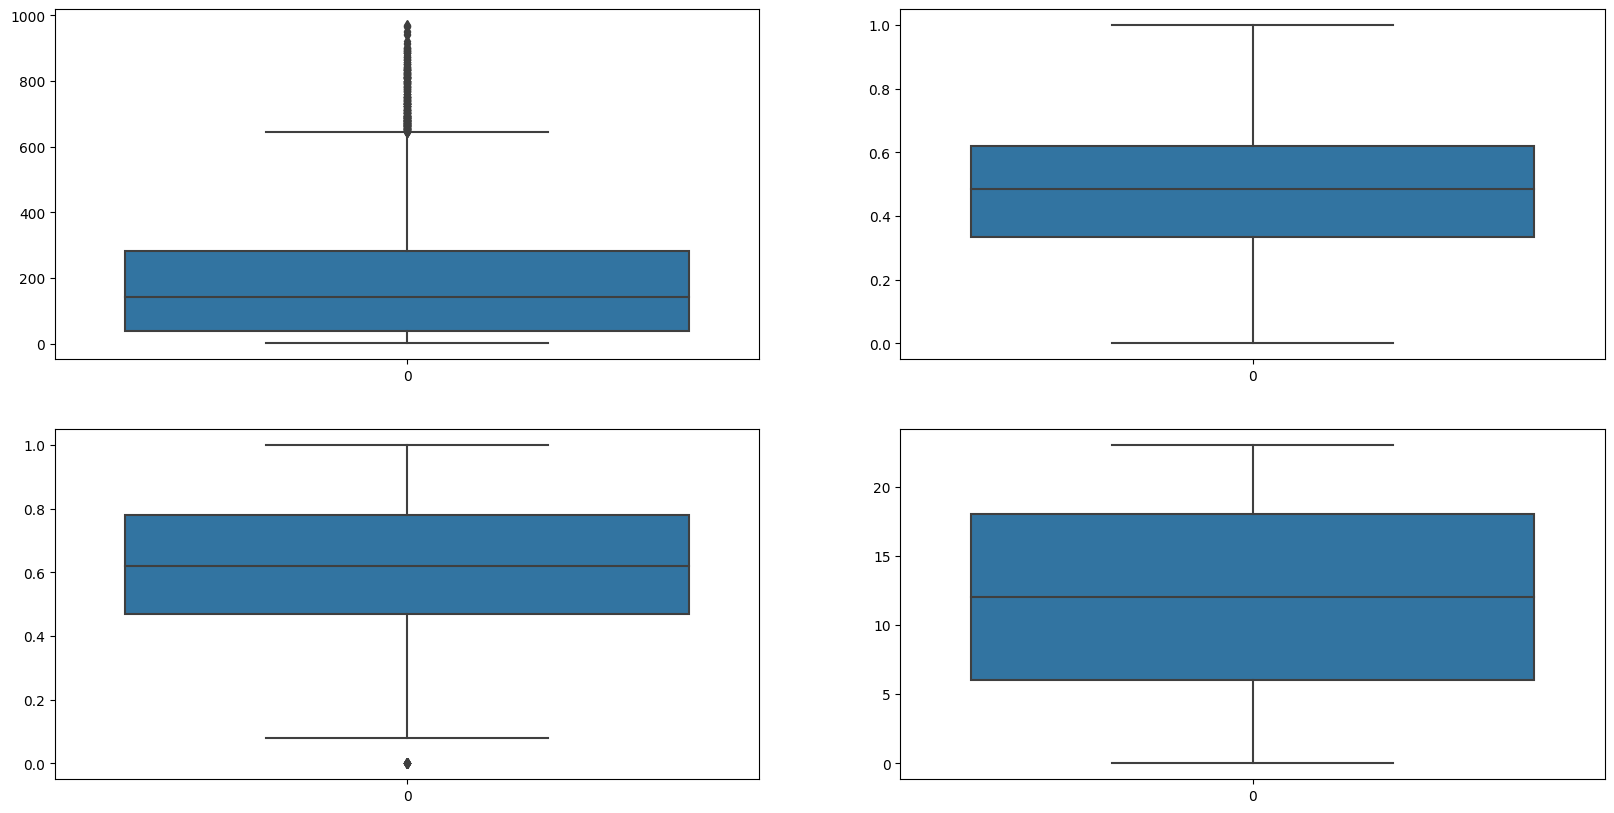

In [105]:
# Plot boxplot untuk mengecek outliers
fig, axes = plt.subplots(2,2, figsize=(20,10))
sns.boxplot(df_train['count'], ax=axes[0][0])
sns.boxplot(df_train['atemp'], ax=axes[0][1])
sns.boxplot(df_train['humidity'], ax=axes[1][0])
sns.boxplot(df_train['hour'], ax=axes[1][1])
plt.show()

In [106]:
df_train[df_train['humidity']==0]

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
1094,0.0,Light snow/Light rain,0,winter,0.3182,0,3,2011,3,Thursday
1095,0.0,Light snow/Light rain,0,winter,0.3182,1,2,2011,3,Thursday
1096,0.0,Light snow/Light rain,0,winter,0.3333,6,12,2011,3,Thursday
1097,0.0,Light snow/Light rain,0,winter,0.3939,7,37,2011,3,Thursday
1098,0.0,Light snow/Light rain,0,winter,0.3939,8,44,2011,3,Thursday
1099,0.0,Light snow/Light rain,0,winter,0.4091,9,24,2011,3,Thursday
1100,0.0,Light snow/Light rain,0,winter,0.4091,11,11,2011,3,Thursday
1101,0.0,Light snow/Light rain,0,winter,0.4242,12,34,2011,3,Thursday
1102,0.0,Light snow/Light rain,0,winter,0.4242,13,12,2011,3,Thursday
1103,0.0,Light snow/Light rain,0,winter,0.4394,15,14,2011,3,Thursday


In [107]:
# Drop feature 'humidity' yang memiliki nilai 0
df_train = df_train[df_train['humidity']!=0]

In [108]:
# Mengecek outliers pada feature 'count'

q1 = df_train['count'].quantile(0.25)
q3 = df_train['count'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5
print(f'IQR: {iqr}')

limit_bawah = q1 - limit
limit_atas = q3 + limit
print(f'limit_bawah: {limit_bawah}')
print(f'limit_atas: {limit_atas}')        

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


In [109]:
# Cek deskriptif statistik kolom count
df_train['count'].describe()

count    12151.000000
mean       189.457329
std        181.242898
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: count, dtype: float64

In [110]:
# Cek count > 645
df_train[df_train['count']>645]

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
3942,0.30,clear,0,summer,0.6515,14,651,2011,8,Tuesday
7292,0.43,cloudy,0,winter,0.6212,18,712,2012,3,Monday
7309,0.37,clear,0,winter,0.6364,17,676,2012,3,Tuesday
7310,0.34,clear,0,winter,0.6364,18,734,2012,3,Tuesday
7325,0.28,clear,0,winter,0.6364,17,782,2012,3,Wednesday
...,...,...,...,...,...,...,...,...,...,...
11748,0.51,clear,0,fall,0.2121,8,659,2012,12,Thursday
11818,0.61,cloudy,0,fall,0.3030,8,724,2012,12,Tuesday
11832,0.65,cloudy,0,fall,0.2576,8,688,2012,12,Wednesday
11853,0.60,clear,0,fall,0.2273,8,679,2012,12,Thursday


**Clean Dataset**

In [111]:
df_train.head(2)

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
0,0.81,clear,0,winter,0.2879,0,16,2011,1,Saturday
1,0.80,clear,0,winter,0.2727,1,40,2011,1,Saturday


In [112]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   humidity  12151 non-null  float64 
 1   weather   12151 non-null  object  
 2   holiday   12151 non-null  category
 3   season    12151 non-null  object  
 4   atemp     12151 non-null  float64 
 5   hour      12151 non-null  int64   
 6   count     12151 non-null  int64   
 7   year      12151 non-null  category
 8   month     12151 non-null  category
 9   day       12151 non-null  object  
dtypes: category(3), float64(2), int64(2), object(3)
memory usage: 795.7+ KB


**Modeling**

In [113]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [114]:
df_train.head()

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
0,0.81,clear,0,winter,0.2879,0,16,2011,1,Saturday
1,0.80,clear,0,winter,0.2727,1,40,2011,1,Saturday
2,0.80,clear,0,winter,0.2727,2,32,2011,1,Saturday
3,0.75,clear,0,winter,0.2879,3,13,2011,1,Saturday
4,0.75,clear,0,winter,0.2879,4,1,2011,1,Saturday


**Encoding**

In [115]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['weather', 'season', 'year']),
    ('Binary', ce.BinaryEncoder(), ['day'])
], remainder='passthrough')

**Data Splitting (Feature dan Target)**

In [116]:
# Memisahkan data independen variabel dengan target

X = df_train.drop(['count'], axis=1)
y = df_train['count']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

**Choosing Benchmark Model**

In [118]:
# Menentukan Algoritma yang akan digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

In [119]:
list_model = [log_lr, log_knn, log_dt, log_rf, log_gb, log_xgb]

score_mae = []
score_mape = []
score_r2 = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for model in list_model:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('Preprocessing', transformer),
        ('model', model)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
    )

    print(model_cv_mae, model)

    score_mae.append(model_cv_mae.mean())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )
    
    print(model_cv_mape, model)
    
    score_mape.append(model_cv_mape.mean())

    # R2
    model_cv_r2 = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='r2',
        error_score='raise'
    )

    print(model_cv_r2, model)

    score_r2.append(model_cv_r2.mean())

[-104.6367932  -104.73188548 -111.28414416 -108.57278709 -111.88330642] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.43128483 -1.44518788 -1.36200451 -1.4324667  -1.39534647] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.24160619 0.18397079 0.16406753 0.18501505 0.11599494] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-46.0547853  -44.23705343 -47.02416589 -43.7597907  -47.4411553 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.45436292 -0.45168466 -0.46419346 -0.41652917 -0.43461059] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[0.83357255 0.

In [120]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'Gradient Boosting', 'XGBoost Regressor'],
    'MAE': score_mae,
    'MAPE': score_mape,
    'R-squared': score_r2
})

,Model,MAE,MAPE,R-squared
0,Linear Regression,-108.221783,-1.413258,0.178131
1,KNN Regressor,-45.703390,-0.444276,0.833066
2,DecisionTree Regressor,-42.734993,-0.466782,0.833400
3,RandomForest Regressor,-32.757434,-0.329204,0.907222
4,Gradient Boosting,-55.558862,-0.474801,0.763944
5,XGBoost Regressor,-28.881241,-0.271619,0.931213


**Extreme Gradient Boosting (XGBoost)**

**Predict to Test Set with the Benchmark Model**

In [121]:
xgb = TransformedTargetRegressor(XGBRegressor(random_state=42), func=np.log, inverse_func=np.exp)

score_mae = []
score_mape = []
score_r2 = []

model = Pipeline([
    ('preprocessing', transformer),
    ('model', xgb)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape, 'R-squared':score_r2}, index=['XGB'])
score_before_tuning

,MAE,MAPE,R-squared
XGB,27.079164,0.262935,0.94301


**Hyperparameter Tuning (GridSearch**)

In [122]:
# Kedalaman pohon
max_depth = [2,3,4,5,6,7,8,9]

# Learning rate
learning_rate = [0.1, 0.001, 0.0001, 0.2, 0.3, 0.5, 0,7]

# Jumlah pohon
n_models = list(np.arange(200, 301, 20))

hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_models': n_models
}

xgb = XGBRegressor(random_state=42, verbosity=0)

# Membuat algorithm chains
model_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)
 
# Hyperparameter tuning(GridSearchCV)
gridsearch_xgb = GridSearchCV(
    model_xgb, 
    param_grid = hyperparam_space_xgb,
    cv = crossval, 
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1,
)

In [123]:
# Fitting data training untuk mencari parameter terbaik
gridsearch_xgb.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['weather',
                                                                          'season',
                                                                          'year']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['day'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylev...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.001, 0.0001, 0.2, 0.3,
                                                  0.5, 0, 7],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'model__n_models': [200, 220, 240, 260, 280, 300]},
             scoring='neg_mean_absolute_error')

In [124]:
print('XGBoost')
print('Best_score', gridsearch_xgb.best_score_)
print('Best_params', gridsearch_xgb.best_params_)

XGBoost
Best_score -27.332390360988633
Best_params {'model__learning_rate': 0.1, 'model__max_depth': 8, 'model__n_models': 200}


In [125]:
model = { 'XGB' : TransformedTargetRegressor(gridsearch_xgb.best_estimator_, func=np.log, inverse_func=np.exp)
         }
xgb_tuning = TransformedTargetRegressor(gridsearch_xgb.best_estimator_, func=np.log, inverse_func=np.exp)

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'R-squared': r2_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,MAPE,R-squared
XGB,26.174921,0.25348,0.945469


**Performance Comparison**

In [126]:
score_before_tuning

,MAE,MAPE,R-squared
XGB,27.079164,0.262935,0.94301


In [127]:
score_after_tuning

,MAE,MAPE,R-squared
XGB,26.174921,0.25348,0.945469


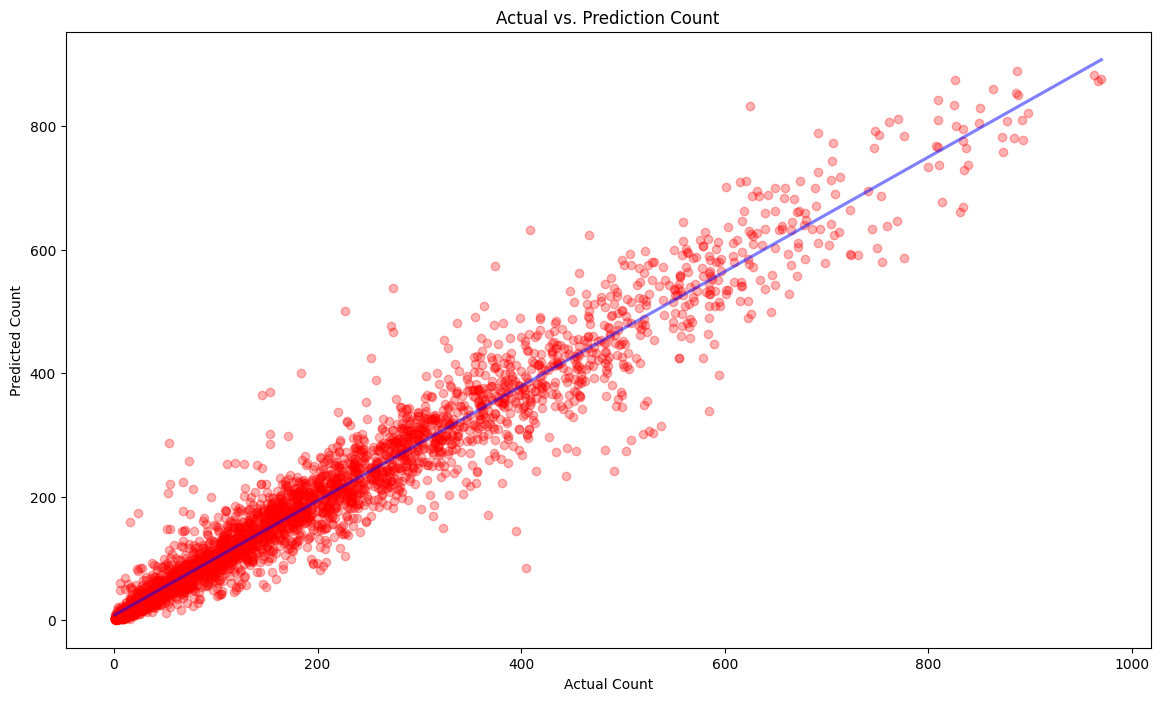

In [128]:
plt.figure(figsize=(14, 8))
sns.regplot(x=y_test, y=y_pred_xgb_tuning, ci=None, scatter_kws={'color': 'red', 'alpha': 0.3}, line_kws= {'color':'blue', 'alpha': 0.5}).set(title='Actual vs. Prediction Count',
                                                xlabel='Actual Count',
                                                ylabel='Predicted Count')
plt.show()

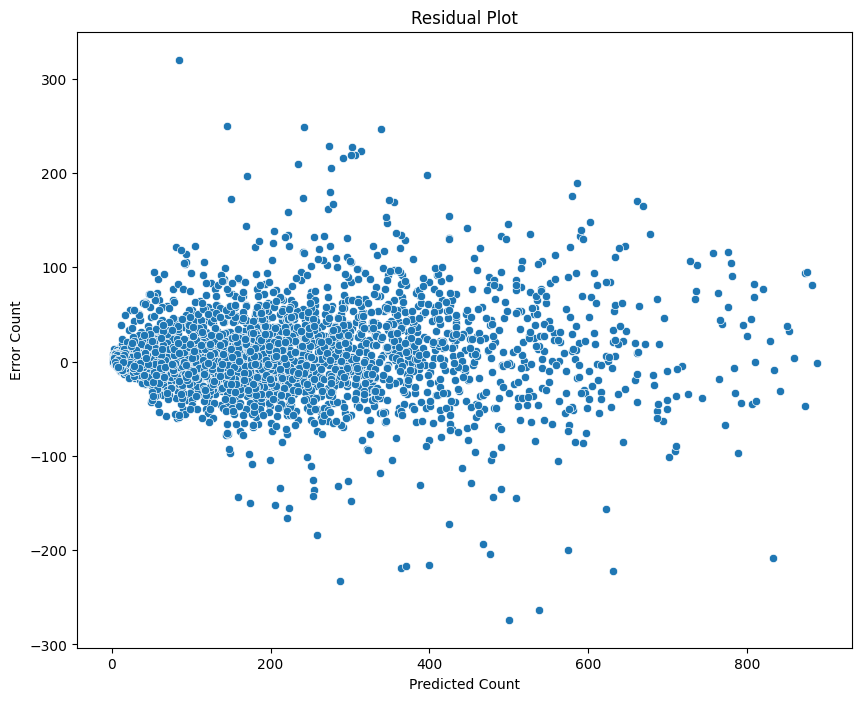

In [129]:
residual = y_test - y_pred_xgb_tuning

plt.figure(figsize=(10,8))
sns.scatterplot(x=y_pred_xgb_tuning, y=residual).set(title='Residual Plot', xlabel='Predicted Count', ylabel='Error Count')
plt.show()

In [130]:
dftarget = pd.DataFrame({'Actual Count': y_test, 'Predicted Count': y_pred_xgb_tuning})

df50 = dftarget[dftarget['Actual Count'] <=50]
df100 = dftarget[(dftarget['Actual Count']>50) & (dftarget['Actual Count']<=100)]
df150 = dftarget[(dftarget['Actual Count']>100) & (dftarget['Actual Count']<=150)]
df200 = dftarget[(dftarget['Actual Count']>150) & (dftarget['Actual Count']<=200)]
df250 = dftarget[(dftarget['Actual Count']>200) & (dftarget['Actual Count']<=250)]
df300 = dftarget[(dftarget['Actual Count']>250) & (dftarget['Actual Count']<=300)]
df350 = dftarget[(dftarget['Actual Count']>300) & (dftarget['Actual Count']<=350)]
df400 = dftarget[(dftarget['Actual Count']>350) & (dftarget['Actual Count']<=400)]
df450 = dftarget[(dftarget['Actual Count']>400) & (dftarget['Actual Count']<=450)]
df500 = dftarget[(dftarget['Actual Count']>450) & (dftarget['Actual Count']<=500)]
df550 = dftarget[(dftarget['Actual Count']>500) & (dftarget['Actual Count']<=550)]
df600 = dftarget[(dftarget['Actual Count']>550) & (dftarget['Actual Count']<=600)]
df600plus = dftarget[dftarget['Actual Count']>600]

target_range = [df50, df100, df150, df200, df250, df300, df350, df400, df450, df500, df550, df600, df600plus, dftarget]
index_range = ['<=50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-550', '551-600', '>600', 'All Count Range (Max 953)']
mae = []
mape = []
for target in target_range:
    scoremae = mean_absolute_error(target['Actual Count'], target['Predicted Count'])
    scoremape = mean_absolute_percentage_error(target['Actual Count'], target['Predicted Count'])
    mae.append(scoremae)
    mape.append(scoremape)

range_metrics = pd.DataFrame({
              "Score MAE": mae,
              "Score MAPE": mape}, index=index_range)
range_metrics

,Score MAE,Score MAPE
<=50,6.414451,0.479099
51-100,19.401112,0.272122
101-150,24.287318,0.195764
151-200,25.528128,0.147697
201-250,33.561909,0.150302
251-300,32.091666,0.116855
301-350,38.719513,0.119290
351-400,46.308589,0.123908
401-450,52.040149,0.123582
451-500,56.880694,0.119779


**Feature Importances**

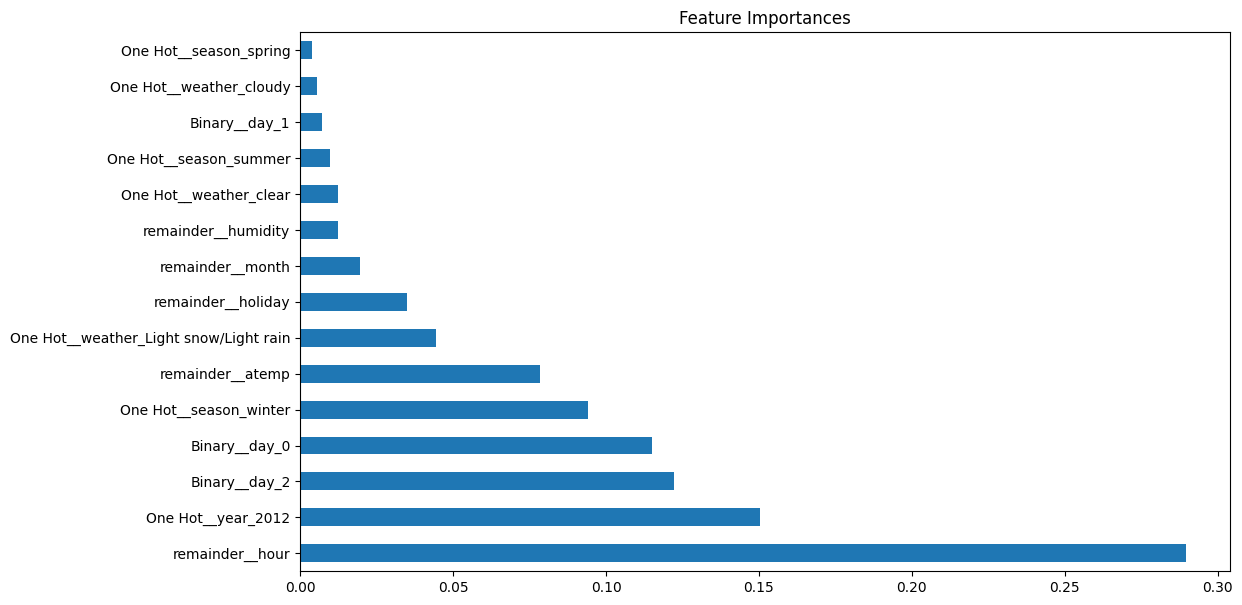

In [137]:
# Plot feature importances
xgb_tuning = gridsearch_xgb.best_estimator_

feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False)
plt.figure(figsize=(12,7))
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()